In [56]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm


import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Vanishing Gradient, Data Generation

In [57]:
backend = Aer.get_backend('qasm_simulator')

np.random.seed(42)
x = np.random.uniform(0, np.pi, (100, 20))
n = 3
d = 10

## Quantum Neural Network

In [7]:
np.random.seed(42)
grad_average = np.zeros((n, d))

for i in tqdm(range(n)):
    network = sequential_qnn(q_bits=d*[5],
                             dim=d*[5] + [1],
                             reps=1,
                             backend = backend,
                             shots = 10000)
    
    network.backward(x[:,:5], include_loss=False)
    
    grad_average[i] = np.array([np.mean(np.abs(grad)) for grad in network.weight_gradient_list])
    
saver(grad_average, data_path("vanishing_grad_depth_10_width_5_reps_1_shots_100k"))

  0%|          | 0/3 [00:00<?, ?it/s]

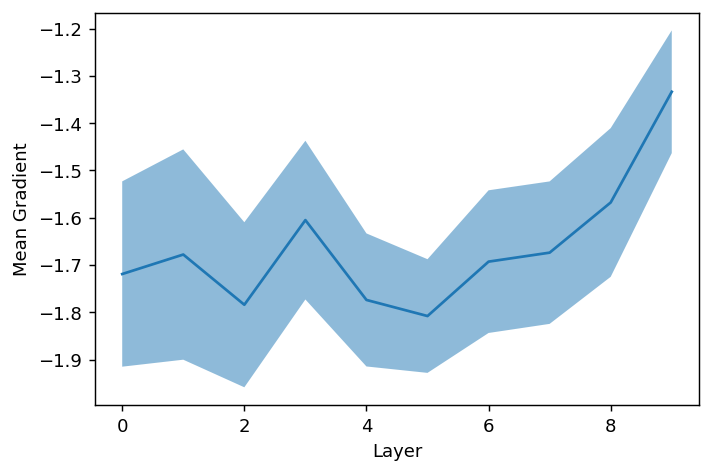

In [58]:
grad_average = loader(data_path("vanishing_grad_depth_10_width_5_reps_1"))

mean = np.mean(grad_average, axis=0)
std = np.std(grad_average, axis=0)/np.sqrt(n)

log_mean = np.log10(mean)
log_std = np.log10(mean + std) - np.log10(mean)

spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi= 130, facecolor='w', edgecolor='k')
plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.show()

In [31]:
np.random.seed(42)
grad_average = np.zeros((n, d))

for i in tqdm(range(n)):
    network = sequential_qnn(q_bits=d*[5],
                             dim=d*[5] + [1],
                             reps=2,
                             backend = backend,
                             shots = 10000)
    
    network.backward(x[:,:5], include_loss=False)
    
    grad_average[i] = np.array([np.mean(np.abs(grad)) for grad in network.weight_gradient_list])
    
saver(grad_average, data_path("vanishing_grad_depth_10_width_5_reps_2"))

  0%|          | 0/10 [00:00<?, ?it/s]

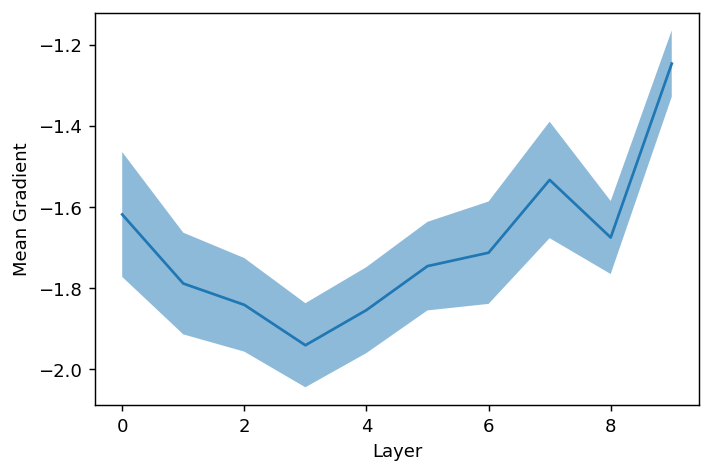

In [59]:
grad_average = loader(data_path("vanishing_grad_depth_10_width_5_reps_2"))

mean = np.mean(grad_average, axis=0)
std = np.std(grad_average, axis=0)/np.sqrt(n)

log_mean = np.log10(mean)
log_std = np.log10(mean + std) - np.log10(mean)

spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi= 130, facecolor='w', edgecolor='k')
plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.show()

In [45]:
np.random.seed(42)
grad_average = np.zeros((n, d))

for i in tqdm(range(n)):
    network = sequential_qnn(q_bits=d*[5],
                             dim=d*[5] + [1],
                             reps=3,
                             backend = backend,
                             shots = 10000)
    
    network.backward(x[:,:5], include_loss=False)
    
    grad_average[i] = np.array([np.mean(np.abs(grad)) for grad in  network.weight_gradient_list])
    
saver(grad_average, data_path("vanishing_grad_depth_10_width_5_reps_3"))

  0%|          | 0/10 [00:00<?, ?it/s]

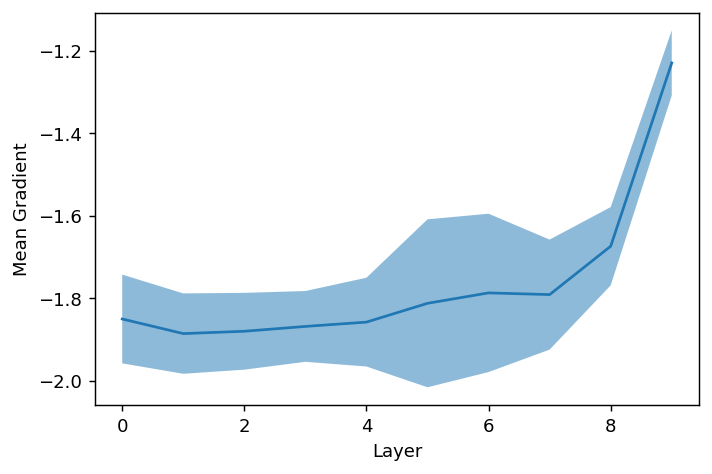

In [60]:
grad_average = loader(data_path("vanishing_grad_depth_10_width_5_reps_3"))

mean = np.mean(grad_average, axis=0)
std = np.std(grad_average, axis=0)/np.sqrt(n)

log_mean = np.log10(mean)
log_std = np.log10(mean + std) - np.log10(mean)

spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi= 130, facecolor='w', edgecolor='k')
plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.show()

## Classical Neural Network

In [37]:
np.random.seed(42)
grad_average = np.zeros((n, d))

for i in tqdm(range(n)):
    network = sequential_dnn(dim=d*[5] + [1])
    
    network.backward(x[:,:5], include_loss=False)
    
    grad_average[i] = np.array([np.mean(np.abs(grad)) for grad in network.weight_gradient_list])

  0%|          | 0/10 [00:00<?, ?it/s]

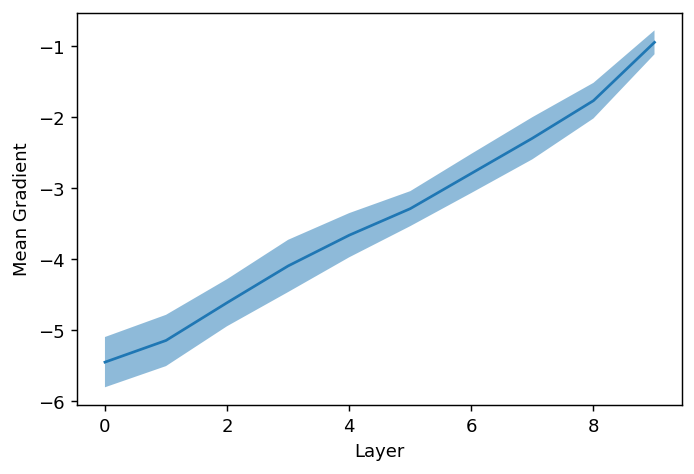

In [38]:
mean = np.mean(grad_average, axis=0)
std = np.std(grad_average, axis=0)

log_mean = np.log10(mean)
log_std = np.log10(mean + std) - np.log10(mean)

spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi= 130, facecolor='w', edgecolor='k')
plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.show()

In [39]:
np.random.seed(42)
grad_average = np.zeros((n, d))

for i in tqdm(range(n)):
    network = sequential_dnn(dim=d*[10] + [1])
    
    network.backward(x[:,:10], include_loss=False)
    
    grad_average[i] = np.array([np.mean(np.abs(grad)) for grad in network.weight_gradient_list])

  0%|          | 0/10 [00:00<?, ?it/s]

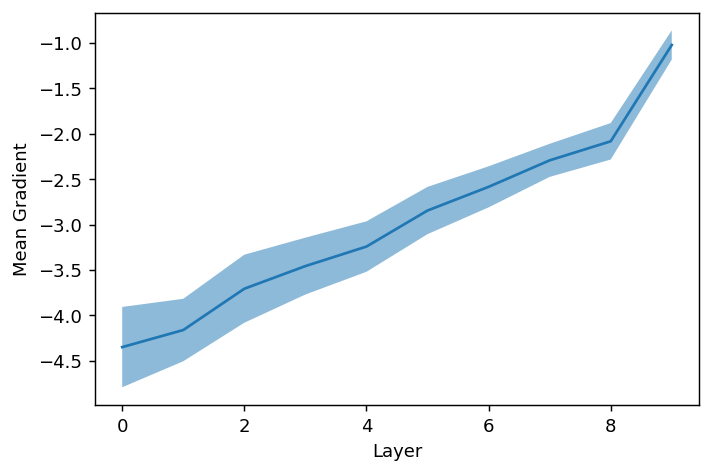

In [40]:

mean = np.mean(grad_average, axis=0)
std = np.std(grad_average, axis=0)

log_mean = np.log10(mean)
log_std = np.log10(mean + std) - np.log10(mean)

spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi= 130, facecolor='w', edgecolor='k')
plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.show()

In [43]:
np.random.seed(42)
grad_average = np.zeros((n, d))

for i in tqdm(range(n)):
    network = sequential_dnn(dim=d*[15] + [1])
    
    network.backward(x[:,:15], include_loss=False)
    
    grad_average[i] = np.array([np.mean(np.abs(grad)) for grad in network.weight_gradient_list])

  0%|          | 0/10 [00:00<?, ?it/s]

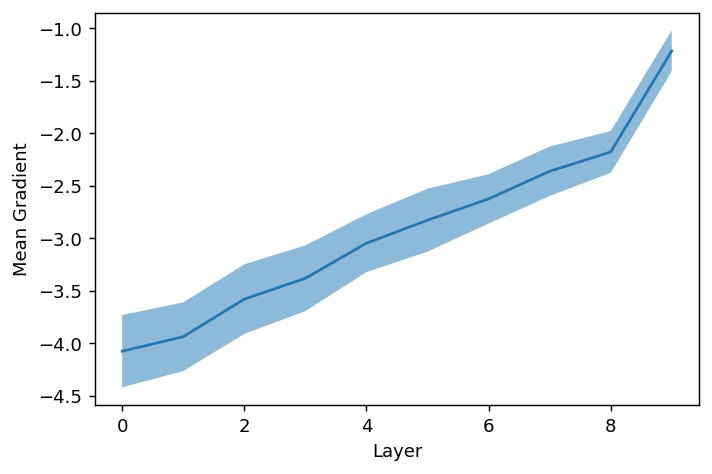

In [44]:

mean = np.mean(grad_average, axis=0)
std = np.std(grad_average, axis=0)

log_mean = np.log10(mean)
log_std = np.log10(mean + std) - np.log10(mean)

spacing = list(range(d))
alpha = 0.5

fig=plt.figure(figsize=(6,4), dpi= 130, facecolor='w', edgecolor='k')
plt.fill_between(spacing, log_mean - log_std, log_mean + log_std, alpha=alpha)
plt.plot(spacing, log_mean)

plt.xlabel("Layer")
plt.ylabel("Mean Gradient")
plt.show()

In [20]:
np.random.seed(42)

In [65]:
A = np.random.normal(0, 0.1, (10, 10))
B = np.random.normal(0, 0.1, (10, 10))
C = np.random.normal(0, 0.1, (10, 10))
D = np.random.normal(0, 0.1, (10, 10))
E = np.random.normal(0, 0.1, (10, 10))
F = np.random.normal(0, 0.1, (10, 10))
G = np.random.normal(0, 0.1, (10, 10))

In [66]:
print(A@B@C@D@E@F@G)

[[ 4.402e-04 -2.344e-04 -2.482e-04 -2.883e-04 -2.803e-05 -1.914e-04
   3.570e-04 -1.525e-04  2.204e-04  1.393e-04]
 [-1.130e-04  1.028e-05  5.012e-05 -3.442e-05 -1.742e-05  1.924e-06
  -6.334e-06 -2.144e-06  1.615e-05 -1.015e-05]
 [ 1.121e-04 -4.965e-05  7.636e-06  5.554e-05  6.601e-06  4.537e-05
  -3.971e-05  2.357e-06 -2.835e-05 -1.434e-05]
 [-1.196e-04  9.560e-05  8.481e-05  1.412e-04  1.318e-05  5.872e-05
  -1.261e-04  6.742e-05 -1.130e-04 -7.535e-05]
 [ 2.003e-04 -1.058e-04 -1.244e-04 -1.823e-04  5.468e-06 -8.163e-05
   2.030e-04 -6.393e-05  9.849e-05  8.021e-05]
 [ 1.623e-05  6.223e-06  4.654e-05  1.058e-04  4.076e-05  1.204e-04
  -1.311e-04  4.854e-05 -7.763e-05 -6.540e-06]
 [ 3.171e-04 -7.562e-05 -1.236e-04 -2.277e-05  3.127e-05  4.467e-05
   1.065e-06 -4.096e-05  4.325e-05  7.556e-05]
 [-4.678e-05 -2.283e-05 -3.128e-05 -1.117e-04 -1.528e-05 -1.411e-04
   2.018e-04 -1.032e-05  2.933e-05  2.233e-06]
 [-1.572e-05  9.824e-06  3.236e-07  8.998e-06 -1.282e-05 -5.161e-08
  -3.353e-05